In [8]:
from hwr.data.generator import IAMSequence
from hwr.constants import ON, SPLIT, DECODER, BASE_DIR
from hwr.models.ONNET import ONNET
from matplotlib import pyplot as plt
from hwr.decoding.ctc_decoder import *
from hwr.decoding.mlf import *
import numpy as np

In [4]:
# Load model
model = ONNET(preload=True)

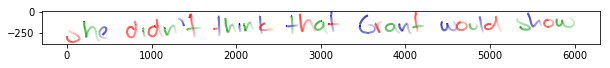

1/1 [==============================] - 1s 661ms/step


"She didn't think that Grant would show "

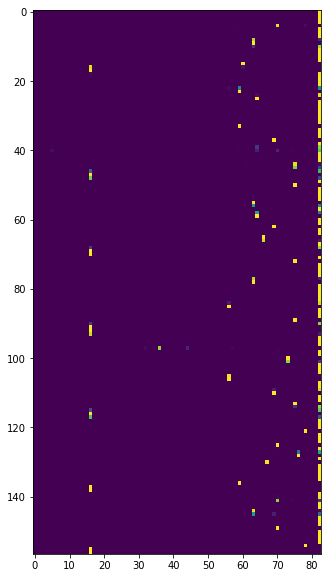

In [23]:
# Sample with pre-decoded output after RNN
pred_seq = IAMSequence(SPLIT.TEST, preprocess=6, npz=True, pred=True, inout_ratio=4)
features, ground_truth, pointset = pred_seq.random_sample()
pointset.plot_strokes()
rnn_out = model.predict_softmax(features)
plt.imshow(rnn_out[0])
ground_truth

In [24]:
best_path_p = BestPathDecoder().decode(rnn_out, 1)[0]
beam_search_p = BeamSearchDecoder(25).decode(rnn_out, 5)
trie_bs_p = TrieBeamSearchDecoder(25).decode(rnn_out, 5)


100%|██████████| 1/1 [00:01<00:00,  1.64s/it]

In [25]:
print("Best path:")
print(best_path_p[0])
print('\n\n')
print("Vanilla beam search:")
for i in range(0, len(beam_search_p[0])):
    print(beam_search_p[0][i])
print('\n\n')
print("Trie beam search:")
for i in range(0, len(trie_bs_p[0])):
    print(trie_bs_p[0][i])

Best path:
ohe didnt think that Grant would ohow 



Vanilla beam search:
ohe didnt think that Grant would ohow 
ohe didnit think that Grant would ohow 
ohe didnt think that Grant would how 
ohe didnot think that Grant would ohow 
ohe didnt think that Orant would ohow 



Trie beam search:
che didnt think that Grant would how 
she didnt think that Grant would how 
o he didnt think that Grant would how 
che didnt think that Grant would show 
oe didnt think that Grant would how 
